## Name: Hyunwoo Roh

In [49]:
from matplotlib import pyplot as plt
from sympy import *
import sympy as sy
import numpy as np
import math

In [50]:
#########################
#       Problem 1       # 
#########################

x = sy.symbols('x')
y = (sin(x)+1)**(sin(cos(x)))
y

(sin(x) + 1)**sin(cos(x))

In [3]:
def sympy_diff(x_vals):
    x = sy.symbols('x')
    f = (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    fp = f.diff(x)
    fp_np = sy.lambdify(x, fp, 'numpy')
    return fp_np(x_vals)

In [51]:
dy=sy.diff(y,x)
dy

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [53]:
dy_lamb=sy.lambdify(x,dy,'numpy')
y_lamb=sy.lambdify(x,y,'numpy')
xvals = np.linspace(-np.pi, np.pi, 100)
print(dy_lamb(5), y_lamb(5))

-0.4117441338415354 0.409241300294768


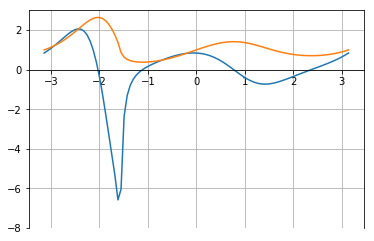

In [55]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals,dy_lamb(xvals))
ax.plot(xvals,y_lamb(xvals))
plt.ylim(-8,3)
plt.grid()
plt.show()

In [7]:
#########################
#       Problem 2       # 
#########################
# Write a function for each of the finite difference quotients

def x_vals(n):
    return np.linspace(-np.pi, np.pi, n)

def fw1(f,x,h):
    return (f(x+h)-f(x))/h
    
def fw2(f,x,h):
    return (-3.*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
    
def bw1(f,x,h):
    return (f(x)-f(x-h))/h
    
def bw2(f, x,h):
    return (3.*f(x)-4.*f(x-h)+f(x-2*h))/(2*h)

def ct2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)
    
def ct4(f, x, h):
    return (f(x-2*h)-8.*f(x-h)+8.*f(x+h)-f(x+2*h))/(12*h)

def centered_o4(f, x, h):
    num = f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)
    return num / (12 * h)

<function matplotlib.pyplot.show(*args, **kw)>

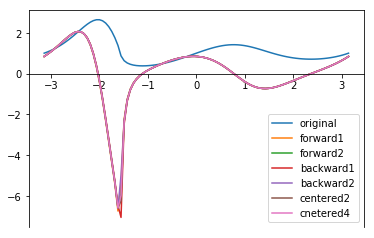

In [56]:
# Plot the results
xvals=x_vals(100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(xvals,y_lamb(xvals),label='original')
ax.plot(xvals, fw1(y_lamb,xvals,0.01),label='forward1')
ax.plot(xvals, fw2(y_lamb,xvals,0.01),label='forward2')
ax.plot(xvals, bw1(y_lamb,xvals,0.01),label='backward1')
ax.plot(xvals, bw2(y_lamb,xvals,0.01),label='backward2')
ax.plot(xvals, ct2(y_lamb,xvals,0.01),label='centered2')
ax.plot(xvals, ct4(y_lamb,xvals,0.01),label='cnetered4')
plt.legend(loc='lower right')
plt.show

In [57]:
# compare them to the results of Problem 1
# We can think of calculating difference from true value.
def test(f,n):
    #return sum(abs(dy_lamb(x_vals(n))-f))
    return np.sqrt(sum((dy_lamb(x_vals(n))-f)**2))

In [58]:
# calculate the error for each method when n=100
n=100
print ((test(fw1(y_lamb,x_vals(n),0.01),n),
test(fw2(y_lamb,x_vals(n),0.01),n),
test(bw1(y_lamb,x_vals(n),0.01),n),
test(bw2(y_lamb,x_vals(n),0.01),n),
test(ct2(y_lamb,x_vals(n),0.01),n),
test(ct4(y_lamb,x_vals(n),0.01),n)))

(0.6997656450349302, 0.16461387561452326, 1.0357569516211347, 1.0702085462088602, 0.17970589160089348, 0.08574585542916602)


In [59]:
# calculate the error for each method when n=300
n=300
print (test(fw1(y_lamb,x_vals(n),0.01),n),
test(fw2(y_lamb,x_vals(n),0.01),n),
test(bw1(y_lamb,x_vals(n),0.01),n),
test(bw2(y_lamb,x_vals(n),0.01),n),
test(ct2(y_lamb,x_vals(n),0.01),n),
test(ct4(y_lamb,x_vals(n),0.01),n))

1.7343772059566547 0.9469287658772867 2.735736878923265 3.8208682613690983 0.5837375762903856 0.9104021397577038


In [12]:
#########################
#       Problem 3       # 
#########################

# In problem 1, we defined dy_lamb that compute the derivative.X_0 = 1
dy_lamb(1), y_lamb(1)

(-0.3965403874194623, 1.3689877347067858)

In [13]:
test_func = [fw1,fw2,bw1,bw2,ct2,ct4]
def error_f(x):
    hvals=np.logspace(-8,0,9)
    abs_error = np.zeros((9,6))
    for i in range(9):
        for j in range(6):
            abs_error[i,j]=abs(test_func[j](y_lamb,x,hvals[i])-dy_lamb(x))
    plt.figure()
    labels = ["fw1","fw2","bw1","bw2","ct2","ct4"]
    for j in range(6):
        plt.loglog(hvals,abs_error[:,j], label=labels[j], marker='o')
    plt.legend(loc='upper left')
    plt.show()

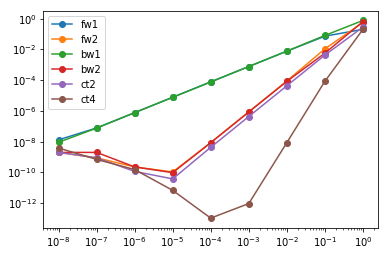

In [14]:
error_f(1)

In [15]:
#########################
#       Problem 4       # 
#########################
data = np.load(r"C:\Users\ericr\Desktop\persp-model-econ_W19\ProblemSets\PS2\plane.npy")
t=data[:0]
alpha=np.deg2rad(data[:,1])
beta=np.deg2rad(data[:,2])

In [16]:
x_pos = 500*np.tan(beta)/(np.tan(beta)-np.tan(alpha))
y_pos = 500*np.tan(alpha)*np.tan(beta)/(np.tan(beta)-np.tan(alpha))

x_veloc = np.zeros(len(x_pos))
y_veloc = np.zeros(len(y_pos))
    
t = 0

while t <= 7:
    if t == 0:
        x_veloc[t] = (x_pos[t+1] - x_pos[t])
        y_veloc[t] = (y_pos[t+1] - y_pos[t])
    elif t < 7:
        x_veloc[t] = (x_pos[t+1] - x_pos[t-1])/2
        y_veloc[t] = (y_pos[t+1] - y_pos[t-1])/2
    else:
        x_veloc[t] = (x_pos[t] - x_pos[t-1])
        y_veloc[t] = (y_pos[t] - y_pos[t-1])
    t += 1

veloc = np.sqrt(x_veloc**2 + y_veloc**2)
print(veloc)

[46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


In [17]:
#########################
#       Problem 5       # 
#########################

# Approximate the Jacobian matrix of f at x using the second order centered difference quotient.

def jacobian(f,x_0):
    h=0.0001
    f_len = len(f(x_0))
    Iden = np.identity(f_len)
    jacob = np.zeros((f_len,len(x_0)))
    for i in range(f_len):
        for j in range(len(x_0)):
            e = Iden[i,:]
            f_h_p = f(x_0+h*e)[j]
            f_h_n = f(x_0-h*e)[j]
            jacob[j,i]=((f_h_p-f_h_n)/(2*h))
    return jacob    
# Test
def func(x):
    return np.array([x[0]**2, x[0]**3 - x[1]])
values = np.array([1.,1.])
jacobian(func,values)

array([[ 2.        ,  0.        ],
       [ 3.00000001, -1.        ]])

In [18]:
x,y=sy.symbols('x,y', real=True)
J = Function('J')(x,y)
f1=x**2
f2=x**3-y
f1x=diff(f1,x)
f1y=diff(f1,y)
f2x=diff(f2,x)
f2y=diff(f2,y)
J = sy.Matrix([[f1x,f1y],[f2x,f2y]])
J.subs([(x,1), (y,1)])

# We can use jacobian function directly
F = sy.Matrix([f1,f2])
F.jacobian([x,y])
F.jacobian([x,y]).subs([(x,1), (y,1)])

Matrix([
[2,  0],
[3, -1]])

We can see that element(2,1) is not exactly same.

In [19]:

from autograd import numpy as anp
from autograd import grad
import time
y = (sin(x)+1)**(sin(cos(x)))
sym=lambda x: y.diff(x)
sym(x)

f = sy.lambdify(x,y,'numpy')
fprime = sy.lambdify(x,sym(x),'numpy')
y2 = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
fauto = grad(y2)

print("result from autograd differentiation", fauto(0.))
print("result from the symbolic differentiation",fprime(0.0))



result from autograd differentiation 0.8414709848078965
result from the symbolic differentiation 0.8414709848078965


In [20]:
#########################
#       Problem 7       # 
#########################

from autograd import numpy as np
from autograd import grad
import time


def problem7(n):
    global time1,time2,time3,abse1,abse2
    time1,time2,time3=[],[],[]
    err1,err2=[],[]
    func = y_lamb
    
    for i in range(n):
        x0=np.random.rand()
        t0=time.clock()
        sym = lambda x:y.diff(x)
        fprime = lambdify(x,sym(x),'numpy')
        exact = fprime(x0)
        
        t1 = time.clock()
        time1.append(t1-t0)
        
        t2 = time.clock()
        xapp = ct4(f,x0,h=0.01)
        t3=time.clock()
        time2.append(t3-t2)
        err1.append(abs(xapp-exact))
        
        t4=time.clock()
        xauto=fauto(x0)
        t5=time.clock()
        time3.append(t5-t4)
        err2.append(abs(xauto-exact))
        
    plt.scatter(np.array(time1),np.array([1e-18] * n), alpha=0.8,label="SymPy")
    plt.scatter(np.array(time2),np.array(err1),alpha=0.8,label="Difference Quotients")
    plt.scatter(np.array(time3),np.array(err2), alpha=0.8,label="Autograd")
    plt.legend(loc='upper right')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.xlim(10**-5,10**-2)
    plt.ylim(10**-19,10**-7)
    plt.loglog()
    plt.show()

C:\Users\ericr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ericr\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ericr\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ericr\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ericr\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: time.clock has been dep

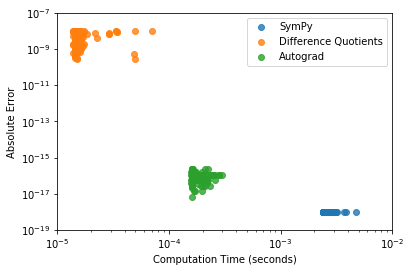

In [21]:
problem7(200)

## Integration Part
#### Question 14.1

In [22]:
g = lambda x: .1 * x ** 4 - 1.5 * x ** 3 + .53 * x ** 2 + 2 * x + 1
a = -10
b = 10
N = 10000

# Calculate the true known value of the integral
import sympy as sy
z = sy.symbols('z')
sy.integrate(0.1*z**4 - 1.5*z**3 + 0.53*z**2 + 2*z + 1, (z, a, b))

4373.33333333333

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import stats as sts

### Midpoint
A more sophisticated midpoint rule is the composite midpoint rule, which breaks up the domain of the function $g(x)$ into $N$ intervals and applies the midpoint rule to each interval. For nodes $x_0,x_1,\ldots,x_{N-1}$ with $x_i=a+\frac{(2i+1)(b-a)}{2N}$, the composite midpoint rule is given by
\begin{equation}\label{NumInt_EqMidPtRuleComp}
  \int_a^b g(x)dx \approx \frac{b-a}{N}\sum_{i=0}^{N-1}g(x_i)
\end{equation}

### Trapezoid
The trapezoid rule estimates the integral as the area under a line that connects the function $g(x)$ at the two endpoints $a$ and $b$.
\begin{equation}\label{NumInt_EqTrapRule}
  \int_a^b g(x)dx \approx \frac{b-a}{2}\bigl[g(a) + g(b)\bigr]
\end{equation}

A more sophisticated trapezoid rule is the composite trapezoid rule, which breaks up the domain of the function $g(x)$ into $N$ intervals and applies the trapezoid rule to each interval.  For nodes $x_0,x_1,\ldots,x_N$ with $x_i=a+i(b-a)/N$, the composite trapezoid rule is given by
\begin{equation}\label{NumInt_EqTrapRuleComp}
  \int_a^b g(x)dx \approx \frac{b-a}{2N}\left[g(x_0) + 2\sum_{i=1}^{N-1}g(x_i) + g(x_N)\right]
\end{equation}

### Simpson
Simpson's rule offers a smooth nonlinear (quadratic) alternative the linear approximations of the midpoint and trapezoid rules. Simpson's rule finds the unique quadratic function in $x$ that passes through the end points and the midpoint of the function $g(a)$, $g\left(\frac{a+b}{2}\right)$, and $g(b)$, which produces the following weights and values.
\begin{equation}\label{NumInt_EqSimpsRule}
  \int_a^b g(x)dx \approx \frac{b-a}{6}\left[g(a) + 4g\left(\frac{a+b}{2}\right) + g(b)\right]
\end{equation}

Again, a more sophisticated Simpson's rule is the composite Simpson's rule, which breaks up the domain of the function $g(x)$ into $2N$ intervals and applies the Simpson's rule to each interval.  For nodes $x_0,x_1,\ldots,x_{2N}$ with $x_i=a+i(b-a)/(2N)$, the composite Simpson's rule is given by
\begin{equation}\label{NumInt_EqTrapRuleComp2}
  \int_a^b g(x)dx \approx \frac{b-a}{6N}\left[g(x_0) + 4\sum_{i=1,3,\ldots}^{2N-1}g(x_i) + 2\sum_{i=2,4,\ldots}^{2N-2}g(x_i) + g(x_{2N})\right]
\end{equation}

In [24]:
def num_integral(func, a, b, N, method='midpoint'):
    
    bin_cuts = np.linspace(a, b, num=N)
    i = np.arange(len(bin_cuts))
    
    if method == 'midpoint':
        xi_vals = a + (((2*i+1)*(b - a))/(2*N))
        g_vals = func(xi_vals)
        w = (b - a)/N
        result_mid = w * np.sum(g_vals[:-1])
        return result_mid
        
    elif method == 'trapezoid':
        xi_vals = a + (i*(b - a))/N
        g_vals = np.sum(2*func(xi_vals)) + func(xi_vals[-1])
        w = (b - a)/(2*N)
        
        result_trap = w * (func(xi_vals[0]) + g_vals)
        return result_trap
    
    elif method == 'simpsons':
            h = (b - a) / N
            s = func(a) + func(b)
            for i in range(1, N, 2):
                s += 4 * func(a + i * h)
            for i in range(2, N-1, 2):
                s += 2 * func(a + i * h)
            result_simp =s * h / 3
            return result_simp
        

In [25]:
midpoint = num_integral(g, -10, 10, 10000, 'midpoint')
print('Integral computed via midpoint method:  ', midpoint)
trap = num_integral(g, -10, 10, 10000, 'trapezoid')
print('Integral computed via trapezoid method: ', trap)
simp = num_integral(g, -10, 10, 10000, 'simpsons')
print('Integral computed via Simpson method:   ', simp)

Integral computed via midpoint method:   4374.1851216356135
Integral computed via trapezoid method:  4378.401681928765
Integral computed via Simpson method:    4373.333333333318


#### Question 14.2
Write a python function that makes a Newton-Cotes discrete approximation of the distribuiton of the normally distributed variable Z~N(mu, sigma)
Let this function take as arguments the mean $\mu$, the standard deviation $\sigma$, the number of equally spaced nodes $N$ to estimate the distribution, and the number of standard deviations $k$ away from $\mu$ to make the furthest nodes on either side of $\mu$. Use the [`scipy.stats.norm.cdf`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) command for the cdf of the normal distribution to compute the weights $\omega_n$ for the nodes $x_n$. Have this function return a vector of nodes of $[Z_1,Z_2,...Z_N]$ and a vector of weights $[\omega_1,\omega_2,...\omega_N]$ such that $\omega_i$ is given by the integral under the normal distribution between the midpoints of the two closest nodes. Define $f(Z;\mu,\sigma)$ as the pdf of the normal distribution and $F(Z;\mu,\sigma)$ as the cdf.
\begin{equation*}
  \begin{split}
    &\omega_i =
      \begin{cases}
        F\left(\frac{Z_1 + Z_2}{2};\mu,\sigma\right) \quad\quad\quad\quad\:\text{if}\quad i = 1 \\
        \int_{Z_{min}}^{Z_{max}}f(Z;\mu,\sigma)dZ \quad\quad\:\:\text{if}\quad 1<i<N \\
        1 - F\left(\frac{Z_{N-1} + Z_{N}}{2};\mu,\sigma\right) \quad\text{if}\quad i = N
      \end{cases} \\
    &\text{where}\quad Z_{min} = \frac{Z_{i-1} + Z_{i}}{2} \quad\text{and}\quad Z_{max} = \frac{Z_{i} + Z_{i+1}}{2}
  \end{split}
\end{equation*}
What are the weights and nodes $\{\omega_n,Z_n\}_{n=1}^N$ for $N=11$?

In [26]:
from scipy.stats import norm # Use norm.cdf
import matplotlib.pyplot as plt

Weights:
[0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.         0.00346697]
Nodes:
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


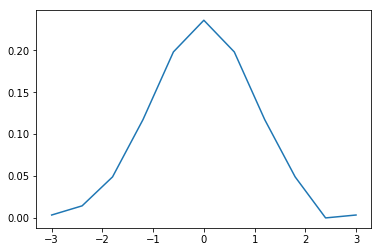

In [27]:
def approx_normal(mu, sigma, N, k):
    
    Z = np.linspace(mu - k*sigma, mu + k*sigma, N)
    w = np.zeros_like(Z)
    w[0] = norm.cdf((Z[0] + Z[1]) / 2, loc=mu, scale=sigma)
    w[N - 1] = 1 - norm.cdf((Z[N - 2] + Z[N - 1]) / 2, loc=mu, scale=sigma)
    for i in range(1, N - 2):
        z_min = (Z[i - 1] + Z[i]) / 2
        z_max = (Z[i] + Z[i + 1]) / 2
        w[i] = norm.cdf(z_max, loc=mu, scale=sigma) - norm.cdf(z_min, loc=mu, scale=sigma)
    return Z, w

Z, w = approx_normal(0,1,11,3)
print('Weights:')
print(w)
print('Nodes:')
print(Z)

plt.plot(Z, w)
plt.show()

In [28]:
import pandas as pd #result table
table = pd.DataFrame({'Z':Z,'Weight':w})
table.index+=1
table

,Z,Weight
1,-3.0,0.003467
2,-2.4,0.014397
3,-1.8,0.048943
4,-1.2,0.117253
5,-0.6,0.198028
6,0.0,0.235823
7,0.6,0.198028
8,1.2,0.117253
9,1.8,0.048943
10,2.4,0.000000


#### Question 14.3
**Exercise 2.3.** If $Z\sim N(\mu,\sigma)$, then $A\equiv e^Z\sim LN(\mu,\sigma)$ is distributed lognormally and $\log(A)\sim N(\mu,\sigma)$. Use your knowledge that $A\equiv e^Z$, $\log(A)\sim N(\mu,\sigma)$, and your function from Exercise 2.2 to write a function that gives a discrete approximation to the lognormal distribution. Note: You will not end up with evenly spaced nodes $[A_1,A_2,...A_N]$, but your weights should be the same as in Exercise 2.2.

Weights:
[0.00346697 0.01439745 0.04894278 0.11725292 0.19802845 0.23582284
 0.19802845 0.11725292 0.04894278 0.         0.00346697]
Nodes:
[ 0.04978707  0.09071795  0.16529889  0.30119421  0.54881164  1.
  1.8221188   3.32011692  6.04964746 11.02317638 20.08553692]


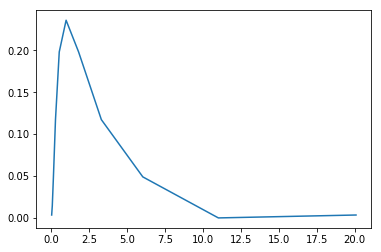

In [29]:
def approx_lognormal(mu, sigma, N, k):
    Z, w_log = approx_normal(mu, sigma, N, k)
    Z_log = np.exp(Z)
    return Z_log, w_log
    
Z_log, w_log = approx_lognormal(0,1,11,3)
print('Weights:')
print(w_log)
print('Nodes:')
print(Z_log)

plt.plot(Z_log,w_log)
plt.show()

Weights are same in 14.2 and 14.3

#### Question 14.4
**Exercise 2.4.** Let $Y_i$ represent the income of individual $i$ in the United States for all individuals $i$. Assume that income $Y_i$ is lognormally distributed in the U.S. according to $Y_i\sim LN(\mu,\sigma)$, where the mean of log income is $\mu = 10.5$ and the standard deviation of log income is $\sigma = 0.8$. Use your function from Exercise 2.3 to compute an approximation of the expected value of income or average income in the U.S. How does your approximation compare to the exact expected value of $E[Y] = e^{\mu + \frac{\sigma^2}{2}}$?

In [30]:
mu = 10.5
sigma = 0.8
N = 100
k = 3
Y, w = approx_lognormal(mu,sigma,N,k)

In [31]:
exact = np.exp(mu+(sigma**2)/2)
print ('Exact expected value :       ', exact)
EY = Y@w
print ('Approximated expected value :       ', EY)

Exact expected value :        50011.087008521754
Approximated expected value :        49739.23910845465


In [32]:
EY = sum(w[i]*Y[i] for i in range(len(Y)))
EY

49739.23910845463

#### Question 14.5
Approximate the integral of the function in Exercise 2.1
**Exercise 3.1.** Approximate the integral of the function in Exercise 2.1 using Gaussian quadrature with $N=3$, $(\omega_1,\omega_2,\omega_3,x_1,x_2,x_3)$. Use the class of polynomials $h_i(x)=x^i$. How does the accuracy of your approximated integral compare to the approximations from Exercise 2.1 and the true known value of the integral?

As a simple example, suppose we want to approximate an arbitrary function $g(x)$ with Gaussian quadrature using a simple class of polynomials $h_i(x) = x^{i}$ and only $N=2$ weights and nodes. The Gaussian quadrature definition equation above implies a system of four equations used to determine the four variables $(\omega_1,\omega_2,x_1,x_2)$ to approximate the integral $\int_a^b g(x)dx \approx \sum_{n=1}^N\omega_n g(x_n)$.
\begin{equation}\label{NumInt_EqGausQuadN2}
  \begin{split}
    &\int_a^b dx = \omega_1 + \omega_2 \\
    &\int_a^b x dx = \omega_1 x_1 + \omega_2 x_2 \\
    &\int_a^b x^2 dx = \omega_1 x_1^2 + \omega_2 x_2^2 \\
    &\int_a^b x^3 dx = \omega_1 x_1^3 + \omega_2 x_2^3
  \end{split}
\end{equation}

In [44]:
# write down all equations as in 14.11 as N=3

import scipy as sc
import scipy.optimize as opt

g = lambda x: .1 * x ** 4 - 1.5 * x ** 3 + .53 * x ** 2 + 2 * x + 1

def equations(parameters):
    
    w1, w2, w3, x1, x2, x3 = parameters
    
    eq0 = (b - a) - (w1 + w2 + w3)
    
    eq1 = ((1/2) * b ** 2 - (1/2) * a ** 2) - (w1 * x1 + w2 * x2 + w3 * x3)
    
    eq2 = ((1/3) * b ** 3 - (1/3) * a ** 3) - (w1 * x1**2 + w2 * x2**2 + w3 * x3**2)
    
    eq3 = ((1/4) * b ** 4 - (1/4) * a ** 4) - (w1 * x1**3 + w2 * x2**3 + w3 * x3**3)
    
    eq4 = ((1/5) * b ** 5 - (1/5) * a ** 5) - (w1 * x1**4 + w2 * x2**4 + w3 * x3**4)
    
    eq5 = ((1/6) * b ** 6 - (1/6) * a ** 6) - (w1 * x1**5 + w2 * x2**5 + w3 * x3**5)
    
    return (eq0, eq1, eq2, eq3, eq4, eq5)

a = -10
b = 10

# np.ones((6,1)) initial guess
init_guess = [0.5, 1, 0.5, -5, 0, 5]
parameters = opt.root(equations,init_guess,tol = 1e-8).x
omega, Z = parameters[:3], parameters[-3:]

integ_val = sum(omega[i]*g(Z[i]) for i in range(len(Z)))


# Calculate the true known value of the integral
import sympy as sy
z = sy.symbols('z')
exact=sy.integrate(0.1*z**4 - 1.5*z**3 + 0.53*z**2 + 2*z + 1, (z, a, b))


print ('Gaussian Quadrature:       ', integ_val)
print ('True known value:       ', exact)

Gaussian Quadrature:        4373.333333321805
True known value:        4373.33333333333


In [48]:
omega

array([5.55555556, 8.88888889, 5.55555556])

#### Question 14.6
Use the python Gaussian quadrature command to numerically approximate integral

In [34]:
sc.integrate.quad(g, -10, 10)

(4373.333333333334, 8.109531705284936e-11)

#### Question 14.7
**Exercise 4.1.** Use Monte Carlo integration to approximate the value of $\pi$. Define a function in that takes as arguments a function $g(\mathbf{x})$ of a vector of variables $\mathbf{x}$, the domain $\Omega$ of $\mathbf{x}$, and the number of random draws $N$ and returns the Monte Carlo approximation of the integral $\int_\Omega g(\mathbf{x}) d\mathbf{x}$. Let $\Omega$ be a generalized rectangle--width $x$ and height $y$. In order to approximate $\pi$, let the functional form of the anonymous function be $g(x,y)$ from Section 4.1 with domain $\Omega = [-1,1]\times[-1,1]$. What is the smallest number of random draws $N$ from $\Omega$ that matches the true value of $\pi$ to the 4th decimal 3.1415? Set the random seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

In [37]:
import math

np.random.seed(seed=25)
def monte(g, domain, N):
    draws = np.zeros((N,2))
    monte_sum = 0
    for i in range(N):
        for j in range(2):
            draws[i,j] = np.random.uniform(domain[j,0],domain[j,1])
        monte_sum+=g(draws[i,:])
    return (4/N)*monte_sum

g = lambda x: 1 if x[0]**2+x[1]**2 <= 1 else 0
domain = np.array([[-1,1],[-1,1]]) 
monte(g,domain,20000)

3.1338000000000004

In [38]:
np.random.seed(seed=25)
toler = 1e-5
diff = 1e3
n = 10
max_N = 100000
while diff > toler and n < max_N:
    pi = monte(g, domain, n)
    diff = np.abs(pi - 3.1415)
    n += 1
print("smallest number of random draws", n, pi)

smallest number of random draws 4432 3.1415030467163167


#### Question 14.8
Define a function in that returns the  𝑛 -th element of a  𝑑 -dimensional equidistributed sequence. It should have support for the four sequences in the Table in Section 4.2.

In [74]:
def n_p(n):
    
    primes = [2]
    num = 3
    while len(primes) < n:
        for p in primes:
            if num % p == 0:
                break
        else:
            primes.append(num)
        num += 2
    return primes

In [75]:
def equidistr(n, d, seq):
    
    if seq == 'weyl':
        prime = n_p(d)
        x = n * np.power(prime, .5)
        xn = x - np.floor(x)
        
    elif seq == 'haber':
        prime = n_p(d)
        x = (n * (n + 1.0)) / 2 * np.power(prime, .5)
        xn = x - np.floor(x)
        
    elif seq == 'niederreiter':
        ar = np.arange(1, d + 1)
        x = n * (2 ** (ar / (d + 1)))
        x_floor = np.floor(x)
        xn = x - x_floor
        
    elif seq == 'baker':
        prime = n_p(d)
        x = n * np.exp(prime)
        xn = x - np.floor(x)
    else:
        raise ValueError('Sequence does not exist.')
        
    return xn

In [76]:
print("weyl:", equidistr(10, 2, 'weyl'))
print("haber:", equidistr(10, 2, 'haber'))
print("niederreiter", equidistr(10, 2, 'niederreiter'))
print("baker", equidistr(5, 2, 'baker'))

weyl: [0.14213562 0.32050808]
haber: [0.78174593 0.26279442]
niederreiter [0.5992105  0.87401052]
baker [0.94528049 0.42768462]


### Question 14.9
**Exercise 4.3** Repeat Exercise 4.1 to approximate the value of $\pi$, this time using quasi-Monte Carlo integration.  You will need to appropriately scale the equidistributed sequences. Compare the rates of convergence. What is the smallest number of random draws $N$ from $\Omega$ for the quasi-Monte Carlo integration that matches the true value of $\pi$ to the 4th decimal 3.1415?. Set the seed in your uniform random number generator to 25. This will make the correct answer consistent across submissions.

In [77]:
np.random.seed(seed=25)
def quasi_monte(N, seq):
    
    pi = 0
    iterate = 0
    s = np.zeros((N, 2), dtype=np.float64)
    for i in range(1, N+1):
        s[i-1, :] = equidistr(i, 2, seq)
    
    for j in range(N):
        if s[j,0] ** 2 + s[j,1] ** 2 <= 1:
            iterate += 1
    pi = 4.0 * iterate / N
    
    return pi

In [78]:
np.random.seed(seed=25)
toler = 1e-5
diff = 1e3
n = 10
max_N = 100000
while diff > toler and n < max_N:
    pi = quasi_monte(n,'weyl')
    diff = np.abs(pi - 3.1415)
    n += 1
print("weyl:", quasi_monte(100000, 'weyl'), "convergence")

weyl: 3.14036 convergence


In [79]:
print("weyl:", quasi_monte(100000, 'weyl'))
print("haber:", quasi_monte(100000, 'haber'))
print("niederreiter", quasi_monte(100000, 'niederreiter'))
print("baker", quasi_monte(100000, 'baker'))

weyl: 3.14036
haber: 3.14396
niederreiter 3.1414
baker 3.1416


In [80]:
np.random.seed(seed=25)
toler = 1e-5
diff = 1e3
n = 10
max_N = 100000
while diff > toler and n < max_N:
    pi_wey = quasi_monte(n,'weyl')
    diff = np.abs(pi_wey - 3.1415)
    n += 1
print("weyl:", quasi_monte(100000, 'weyl'), "smallest number of random draws", n)

weyl: 3.14036 smallest number of random draws 1683


In [81]:
np.random.seed(seed=25)
toler = 1e-5
diff = 1e3
n = 10
max_N = 100000
while diff > toler and n < max_N:
    pi_haber = quasi_monte(n,'haber')
    diff = np.abs(pi_haber - 3.1415)
    n += 1
print("haber:", quasi_monte(100000, 'haber'), "smallest number of random draws", n)

haber: 3.14396 smallest number of random draws 1054


In [82]:
np.random.seed(seed=25)
toler = 1e-5
diff = 1e3
n = 10
max_N = 100000
while diff > toler and n < max_N:
    pi_nieder = quasi_monte(n,'niederreiter')
    diff = np.abs(pi_nieder - 3.1415)
    n += 1
print("niederreiter:", quasi_monte(100000, 'niederreiter'), "smallest number of random draws", n)

niederreiter: 3.1414 smallest number of random draws 1888


In [83]:
np.random.seed(seed=25)
toler = 1e-5
diff = 1e3
n = 10
max_N = 100000
while diff > toler and n < max_N:
    pi_baker = quasi_monte(n,'baker')
    diff = np.abs(pi_baker - 3.1415)
    n += 1
print("baker:", quasi_monte(100000, 'baker'), "smallest number of random draws", n)

KeyboardInterrupt: 

In terms of number of draws, 
haber < weyl < niederreiter 